In [2]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

tables = soup.find_all("table")
tesla_revenue = pd.read_html(str(tables))[0]

print(tesla_revenue.tail())


                                                   0
0  Will be right back... Thank you for your patie...


In [7]:
import yfinance as yf

gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")

gme_data.reset_index(inplace=True)

display(gme_data.head())


[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME,GME
0,2010-01-04,3.854643,5.7250,5.7375,5.5000,5.5175,26702800
1,2010-01-05,3.959005,5.8800,5.9350,5.7250,5.7275,21269600
2,2010-01-06,4.044851,6.0075,6.0250,5.8050,5.8650,21471200
3,2010-01-07,3.443930,5.1150,5.2925,4.8550,5.0025,164761200
4,2010-01-08,3.415316,5.0725,5.3075,5.0575,5.1600,47872400


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", {"class": "historical_data_table"})
rows = table.find_all("tr")
dates = []
revenues = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            dates.append(date)
            revenues.append(float(revenue))
gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue = gme_revenue.sort_values(by="Date").reset_index(drop=True)
print(gme_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

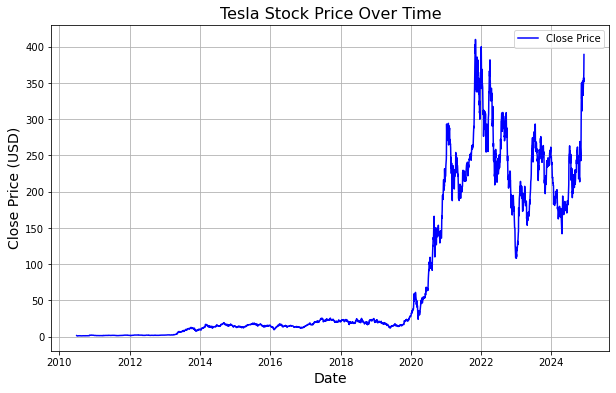

In [9]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price (USD)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()
make_graph(tesla_data, "Tesla Stock Price Over Time")


InvalidIndexError: (slice(None, None, None), None)

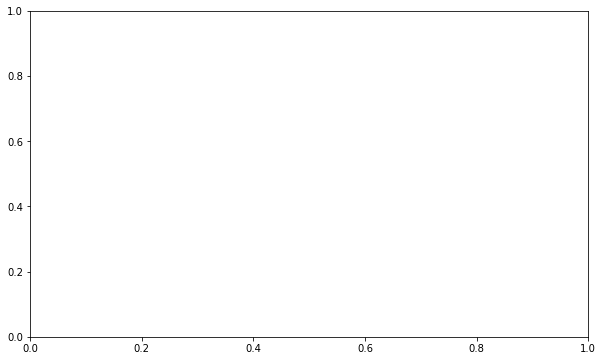

In [11]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='green')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price (USD)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()
make_graph(gme_data, "GameStop Stock Price Over Time")